In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml

In [71]:
df = pd.DataFrame()

In [72]:
import pandas as pd
import numpy as np

# Create initial scaling values
scaling_values = [0.1, 0.2, 0.3, 0.5, 1, 2, 4, 7, 12, 20]
sample_sizes = [1000, 10000, 100000, 1000000]

# Create an empty dataframe to store all combinations
rows = []

# Generate combinations of scaling and sample_size
for size in sample_sizes:
    for scale in scaling_values:
        # Calculate n for each combination
        n_raw = (1 + np.sqrt(1 + 8 * scale * size)) / 2

        # Round to nearest integer
        n_rounded = round(n_raw)

        # Ensure the result is even
        n_even = n_rounded + (n_rounded % 2)

        rows.append({
            'sample_size': size,
            'scaling': scale,
            'n_raw': n_raw,
            'qtl_n': n_even  # This is rounded to nearest even integer
        })

# Create the dataframe from the rows
df = pd.DataFrame(rows)

# Optional: format the dataframe for better display
df = df.sort_values(['sample_size', 'scaling']).reset_index(drop=True)
df['cons'] = np.log(df['sample_size'])
#df['log_sample'] = np.log

In [73]:
df

,sample_size,scaling,n_raw,qtl_n,cons
0,1000,0.1,14.650972,16,6.907755
1,1000,0.2,20.506249,22,6.907755
2,1000,0.3,25.000000,26,6.907755
3,1000,0.5,32.126729,32,6.907755
4,1000,1.0,45.224155,46,6.907755
5,1000,2.0,63.747530,64,6.907755
6,1000,4.0,89.944117,90,6.907755
7,1000,7.0,118.822652,120,6.907755
8,1000,12.0,155.420141,156,6.907755
9,1000,20.0,200.500625,202,6.907755


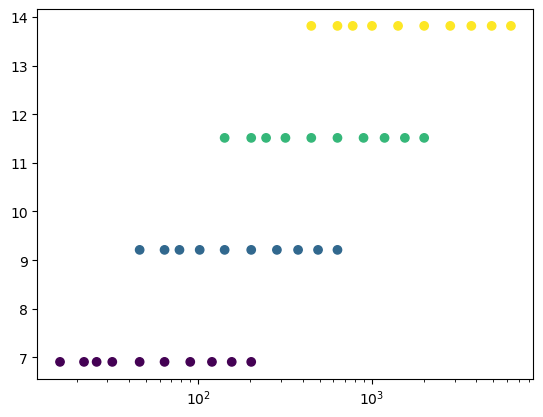

In [74]:
plt.scatter(df['qtl_n'], df['cons'], c=np.log(df['sample_size']))
plt.xscale('log')


In [75]:
config = {
    'parameter_sets': []
}

# Add each row from the dataframe as a parameter set
for _, row in df.iterrows():
    config['parameter_sets'].append({
        'sample_size': int(row['sample_size']),
        'scaling': float(row['scaling']),
        'qtl_n': int(row['qtl_n'])
    })


In [76]:
# Save to YAML file
with open('Snakemake_wildcard_config.yaml', 'w') as f:
    yaml.dump(config, f, default_flow_style=False)